<a href="https://colab.research.google.com/github/pakaji93/Data_Science_Project/blob/main/Mini_Project_2_Gandhung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Preparation untuk import library dan juga import excel file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# read data dari google sheets untuk dijadikan dataframe

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1O0CGkMWDGyizHcm0p3tZ_6--Kv57-WFEm6Xo0ki0CXY/edit?usp=sharing')
sheets = gsheets.worksheet('Paid-Transaction').get_all_values()

In [ ]:
sheets2 = gsheets.worksheet('Transaction Fee').get_all_values()

In [ ]:
sheets3 = gsheets.worksheet('Seller').get_all_values()

In [ ]:
sheets4 = gsheets.worksheet('Confirmed-Transaction').get_all_values()

In [ ]:
sheets5 = gsheets.worksheet('Cancelled-Transaction').get_all_values()

# Question 1

In Paid-Transaction sheet, Insert column after Last Name, name the new column as Full Name an have the values like this

**'First Name' + '.' + 'Last Name' (example: Ayuni . Binbin)**

In [ ]:
Q1 = pd.DataFrame(sheets)
Q1.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
1,20170724,"201,707,240,088,517",elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,"300,000","153,000","10,200","9,000",0
2,20170701,"201,707,018,889,790",BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,"287,800","68,000",0,0,0
3,20170707,"201,707,079,264,675",Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln","35,000",0,700,0,0
4,20170720,"201,707,209,945,714",Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,"85,000",0,"5,900",0,0


In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q1.set_axis(Q1.iloc[0], axis='columns', inplace=True)
Q1.drop(0, inplace=True)
Q1.reset_index(drop=True, inplace=True)

In [ ]:
#menambahkan column Full Name setelah column Last Name dan kriteria value nya

Q1.insert (4, 'Full Name', Q1['First Name'].str.title() + ' . ' + Q1['Last Name'].str.title())

In [ ]:
Q1.iloc[:,2:5].head()

,First Name,Last Name,Full Name
0,elvride,aries,Elvride . Aries
1,BASIR,Ninuk,Basir . Ninuk
2,Citra,Ardi,Citra . Ardi
3,Dian,Renaldi,Dian . Renaldi
4,rizal,Tamba,Rizal . Tamba


# Question 2

In Paid-Transaction sheet, insert two columns next to Paid Date.		
Name the first one as Paid Date 2 and the second as Paid Day.

Paid Date 2 = 01-Jan-1990

Paid Day    = Mon

In [ ]:
Q2 = pd.DataFrame(sheets)

In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q2.set_axis(Q2.iloc[0], axis='columns', inplace=True)
Q2.drop(0, inplace=True)
Q2.reset_index(drop=True, inplace=True)

In [ ]:
#menambahkan column Paid Date 2 dan Paid Day setelah column Paid Date dan kriteria value nya

Q2.insert (1, 'Paid Date 2', pd.to_datetime(Q2['Paid Date'], format="%Y%m%d"))
Q2.insert (2, 'Paid Day', pd.to_datetime(Q2['Paid Date'], format="%Y%m%d"))

In [ ]:
#merubah tipe data datetime sesuai dengan soal

Q2['Paid Date 2'] = Q2['Paid Date 2'].dt.strftime('%d-%b-%Y')
Q2['Paid Day'] = Q2['Paid Day'].dt.strftime('%a')

In [ ]:
Q2.iloc[:,0:3].head()

,Paid Date,Paid Date 2,Paid Day
0,20170724,24-Jul-2017,Mon
1,20170701,01-Jul-2017,Sat
2,20170707,07-Jul-2017,Fri
3,20170720,20-Jul-2017,Thu
4,20170722,22-Jul-2017,Sat


# Question 3

In Paid-Transaction sheet, Insert column after Seller Discount, name the new column as GMV			
Fill in GMV based on the following Business Rules	

GMV is Gross Merchandise Value			
GMV contains of Transaction amount substracts Seller Discount but includes Delivery Fee			

In [ ]:
Q3 = pd.DataFrame(sheets)

In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q3.set_axis(Q3.iloc[0], axis='columns', inplace=True)
Q3.drop(0, inplace=True)
Q3.reset_index(drop=True, inplace=True)
Q3.head()

,Paid Date,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount
0,20170724,"201,707,240,088,517",elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,"300,000","153,000","10,200","9,000",0
1,20170701,"201,707,018,889,790",BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,"287,800","68,000",0,0,0
2,20170707,"201,707,079,264,675",Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln","35,000",0,700,0,0
3,20170720,"201,707,209,945,714",Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,"85,000",0,"5,900",0,0
4,20170722,"201,707,220,002,354",rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,"81,000",0,"5,600",0,0


In [ ]:
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Paid Date           12000 non-null  object
 1   Order Number        12000 non-null  object
 2   First Name          12000 non-null  object
 3   Last Name           12000 non-null  object
 4   Meta Category       12000 non-null  object
 5   Product Name        12000 non-null  object
 6   Transaction Amount  12000 non-null  object
 7   Seller Discount     12000 non-null  object
 8   Sales Discount      12000 non-null  object
 9   Delivery Fee        12000 non-null  object
 10  Other Discount      12000 non-null  object
dtypes: object(11)
memory usage: 1.0+ MB


In [ ]:
# menghilangkan koma ',' pada value agar pada saat merubah tipe data dari object(string) ke numeric tidak terjadi error

Q3['Transaction Amount'].replace({',':''},inplace=True,regex=True)
Q3['Seller Discount'].replace({',':''},inplace=True,regex=True)
Q3['Sales Discount'].replace({',':''},inplace=True,regex=True)
Q3['Delivery Fee'].replace({',':''},inplace=True,regex=True)
Q3['Other Discount'].replace({',':''},inplace=True,regex=True)

In [ ]:
# merubah tipe data menjadi numeric

Q3['Transaction Amount']=pd.to_numeric(Q3['Transaction Amount'],errors='coerce')
Q3['Seller Discount']=pd.to_numeric(Q3['Seller Discount'],errors='coerce')
Q3['Sales Discount']=pd.to_numeric(Q3['Sales Discount'],errors='coerce')
Q3['Delivery Fee']=pd.to_numeric(Q3['Delivery Fee'],errors='coerce')
Q3['Other Discount']=pd.to_numeric(Q3['Other Discount'],errors='coerce')

In [ ]:
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Paid Date           12000 non-null  object 
 1   Order Number        12000 non-null  object 
 2   First Name          12000 non-null  object 
 3   Last Name           12000 non-null  object 
 4   Meta Category       12000 non-null  object 
 5   Product Name        12000 non-null  object 
 6   Transaction Amount  12000 non-null  int64  
 7   Seller Discount     12000 non-null  float64
 8   Sales Discount      12000 non-null  float64
 9   Delivery Fee        12000 non-null  int64  
 10  Other Discount      12000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 1.0+ MB


In [ ]:
# menambah kolom GMV dan kriteria value GMV

Q3.insert (8, 'GMV', 0)
Q3['GMV'] = Q3['Transaction Amount'] - Q3['Seller Discount'] + Q3['Delivery Fee']
Q3[['GMV']]

,GMV
0,156000.0
1,219800.0
2,35000.0
3,85000.0
4,81000.0
...,...
11995,33000.0
11996,57500.0
11997,69000.0
11998,75000.0


# Question 4

In Paid-Transaction sheet, insert column 'Net Revenue'				
Calculate Net Revenue for each transaction:
			
	Net Revenue = Transaction Fee Amount - Sales Discount - Other Discount			
				
Transaction Fee reference is available on separate sheet.

In [ ]:
Q4_PT = pd.DataFrame(sheets)
Q4_TF = pd.DataFrame(sheets2)

In [ ]:
#sheet Paid Transaction
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q4_PT.set_axis(Q4_PT.iloc[0], axis='columns', inplace=True)
Q4_PT.drop(0, inplace=True)
Q4_PT.reset_index(drop=True, inplace=True)

In [ ]:
#sheet Transaction Fee
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q4_TF.set_axis(Q4_TF.iloc[0], axis='columns', inplace=True)
Q4_TF.drop(0, inplace=True)
Q4_TF.reset_index(drop=True, inplace=True)

In [ ]:
# menambahkan kolom Paid Month Year untuk nanti nya sebagai key join pada kedua dataframe dan menentukan tipe datanya

Q4_PT.insert (1, 'Paid Month Year', pd.to_datetime(Q4_PT['Paid Date'], format="%Y%m%d"))
Q4_TF.insert (1, 'Paid Month Year', pd.to_datetime(Q4_TF['Month'], format="%Y%m"))

In [ ]:
# merubah format tipe data

Q4_PT['Paid Month Year'] = Q4_PT['Paid Month Year'].dt.strftime('%B %Y')
Q4_TF['Paid Month Year'] = Q4_TF['Paid Month Year'].dt.strftime('%B %Y')

In [ ]:
# join kedua dataframe dengan join left 

Q4_J = pd.merge(Q4_PT, Q4_TF, how='left', left_on=['Paid Month Year','Meta Category'], right_on=['Paid Month Year','Meta Category'])

In [ ]:
Q4_J.head()

,Paid Date,Paid Month Year,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate
0,20170724,July 2017,"201,707,240,088,517",elvride,aries,Babies/ Kids,Pineapple Hat Anak Ala Korea - 6M - 4Y - Unise...,"300,000","153,000","10,200","9,000",0,201707,3.4%
1,20170701,July 2017,"201,707,018,889,790",BASIR,Ninuk,Service/ Mokado,Pulsa BOLT 150.000,"287,800","68,000",0,0,0,201707,1.0%
2,20170707,July 2017,"201,707,079,264,675",Citra,Ardi,Service/ Mokado,"XTRA Combo 12X 6GB, 12bln","35,000",0,700,0,0,201707,1.0%
3,20170720,July 2017,"201,707,209,945,714",Dian,Renaldi,Fashion,Square Foldable Travel Bag / Tas Koper Luggage...,"85,000",0,"5,900",0,0,201707,9.0%
4,20170722,July 2017,"201,707,220,002,354",rizal,Tamba,Gadget/ Komputer,Samsung Galaxy Note 5 Gold,"81,000",0,"5,600",0,0,201707,3.0%


In [ ]:
# menghilangkan koma ',' pada value agar pada saat merubah tipe data dari object(string) ke numeric tidak terjadi error

Q4_J['Transaction Amount'].replace({',':''},inplace=True,regex=True)
Q4_J['Seller Discount'].replace({',':''},inplace=True,regex=True)
Q4_J['Sales Discount'].replace({',':''},inplace=True,regex=True)
Q4_J['Delivery Fee'].replace({',':''},inplace=True,regex=True)
Q4_J['Other Discount'].replace({',':''},inplace=True,regex=True)

In [ ]:
# merubah tipe data menjadi float

Q4_J['Transaction Amount']=pd.to_numeric(Q4_J['Transaction Amount'],errors='coerce')
Q4_J['Seller Discount']=pd.to_numeric(Q4_J['Seller Discount'],errors='coerce')
Q4_J['Sales Discount']=pd.to_numeric(Q4_J['Sales Discount'],errors='coerce')
Q4_J['Delivery Fee']=pd.to_numeric(Q4_J['Delivery Fee'],errors='coerce')
Q4_J['Other Discount']=pd.to_numeric(Q4_J['Other Discount'],errors='coerce')
Q4_J['Transaction Fee Rate'] = Q4_J['Transaction Fee Rate'].str.rstrip('%').astype('float') / 100.0

In [ ]:
Q4_J.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paid Date             12000 non-null  object 
 1   Paid Month Year       12000 non-null  object 
 2   Order Number          12000 non-null  object 
 3   First Name            12000 non-null  object 
 4   Last Name             12000 non-null  object 
 5   Meta Category         12000 non-null  object 
 6   Product Name          12000 non-null  object 
 7   Transaction Amount    12000 non-null  int64  
 8   Seller Discount       12000 non-null  float64
 9   Sales Discount        12000 non-null  float64
 10  Delivery Fee          12000 non-null  int64  
 11  Other Discount        12000 non-null  float64
 12  Month                 12000 non-null  object 
 13  Transaction Fee Rate  12000 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
Q4_J['Net Revenue'] = (Q4_J['Transaction Amount']*Q4_J['Transaction Fee Rate'])-Q4_J['Sales Discount']-Q4_J['Other Discount']

In [ ]:
Q4_J[['Net Revenue']].head()

,Net Revenue
0,0.0
1,2878.0
2,-350.0
3,1750.0
4,-3170.0


# Question 5

Add new sheet, name it Question5. Add ONE chart		
On primary axis, show monthly GMV figures using bar chart.		
On secondary axis, plot monthly %Net Revenue as line chart.	
 
 	
%Net Revenue = Net Revenue / GMV		
		
Did we do well in December 2017?		

In [ ]:
Q5 = Q4_J

In [ ]:
# set column GMV dari Q3 dataframe

Q5['GMV'] = Q3['GMV']

In [ ]:
Q5['% Net Revenue'] = Q5['Net Revenue'] / Q5['GMV']

In [ ]:
Q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Paid Date             12000 non-null  object 
 1   Paid Month Year       12000 non-null  object 
 2   Order Number          12000 non-null  object 
 3   First Name            12000 non-null  object 
 4   Last Name             12000 non-null  object 
 5   Meta Category         12000 non-null  object 
 6   Product Name          12000 non-null  object 
 7   Transaction Amount    12000 non-null  int64  
 8   Seller Discount       12000 non-null  float64
 9   Sales Discount        12000 non-null  float64
 10  Delivery Fee          12000 non-null  int64  
 11  Other Discount        12000 non-null  float64
 12  Month                 12000 non-null  object 
 13  Transaction Fee Rate  12000 non-null  float64
 14  Net Revenue           12000 non-null  float64
 15  GMV                

In [ ]:
#groupby berdasarkan Bulan dan melihat aggregate %Net Revenue (rata-rata/bulan) dan GMV (akumulasi/bulan)

Q5_1 = Q5.groupby(['Month']).agg({'% Net Revenue':'mean',\
                                                                  'GMV':'sum'})

In [ ]:
Q5_1.sort_index(inplace=True)
Q5_1

,% Net Revenue,GMV
Month,,
201707,0.028001,378138400.0
201708,0.005808,443389800.0
201709,0.057794,455269100.0
201710,0.006697,265146800.0
201711,0.018539,589861400.0
201712,-0.001008,582788100.0


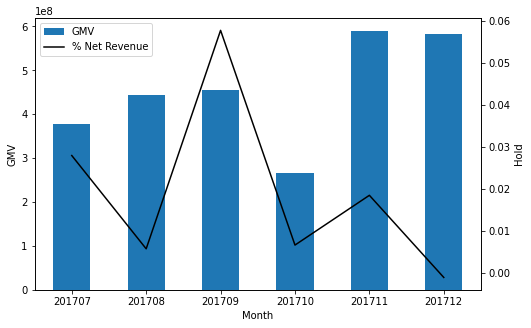

In [ ]:
# membuat grafik bar dan line menjadi 1 tampilan grafik
# assign nilai GMV sebagai bar chart
# assign nilai % Net Revenue sebagai line chart kemudian memasukan bar chart pada function plotnya

ax =  Q5_1.plot.bar(y='GMV', ylabel='GMV', figsize=(8, 5))
Q5_1.plot(y='% Net Revenue', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False)
ax.right_ax.set_ylabel('Hold');

#Secara GMV kita tinggi, tapi kita gaining % Revenue kita sangat rendah

# Question 6

In a new sheet (Name Question6), create a pivot table, do this grouping:				
				
```
Group 1
Home/ Food
Sports/ Hobi/ Otomotif
Fashion
Beauty/ Health
```
```
Group 2			
Gadget/ Komputer			
Elektronik			
Service/ Mokado			
Babies/ Kids
```			
				
Show monthly %Net Revenue for each group. In December 2017, how do these two groups compare? (Put your answer in sheet Question6)				

In [ ]:
Q6 = Q5
Q6.tail()

,Paid Date,Paid Month Year,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,Delivery Fee,Other Discount,Month,Transaction Fee Rate,Net Revenue,GMV,% Net Revenue
11995,20171201,December 2017,"201,712,012,704,898",Fitrah,gina,Service/ Mokado,"Xtra Combo 12GB, 30hr",333000,300000.0,2300.0,0,0.0,201712,0.009,697.0,33000.0,0.021121
11996,20171203,December 2017,"201,712,032,723,513",Djebeng,Shinta,Service/ Mokado,"Xtra Combo 12GB, 30hr",280000,222500.0,0.0,0,0.0,201712,0.009,2520.0,57500.0,0.043826
11997,20171204,December 2017,"201,712,042,740,205",Amik,Elan,Home/ Food,Kreta - Kripik Tempe Indonesia - Rasa Jomblo d...,150000,81000.0,4800.0,0,0.0,201712,0.067,5250.0,69000.0,0.076087
11998,20171207,December 2017,"201,712,072,778,621",Anna,asih,Gadget/ Komputer,Samsung Galaxy J5 Pro Garansi Resmi Special Price,475000,400000.0,0.0,0,0.0,201712,0.032,15200.0,75000.0,0.202667
11999,20171205,December 2017,"201,712,052,746,101",nidyah,ayi,Service/ Mokado,[SERBU 11.12] Share Tea Cocoa Rocksalt & Chees...,475000,400000.0,20000.0,17000,0.0,201712,0.009,-15725.0,92000.0,-0.170924


In [ ]:
Q6['Meta Category'].unique()

array(['Babies/ Kids', 'Service/ Mokado', 'Fashion', 'Gadget/ Komputer',
       'Beauty/ Health', 'Home/ Food', 'Sports/ Hobi/ Otomotif',
       'Elektronik'], dtype=object)

In [ ]:
# menambahkan column Group Category untuk grouping masing-masing kategori dengan map

Q6['Group Category'] = Q6['Meta Category'].map({'Home/ Food':'Group 1','Sports/ Hobi/ Otomotif':'Group 1','Fashion':'Group 1','Beauty/ Health':'Group 1'
                                                ,'Gadget/ Komputer':'Group 2','Elektronik':'Group 2','Service/ Mokado':'Group 2','Babies/ Kids':'Group 2'})

In [ ]:
# membuat pivot berdasarkan Group Category, dengan column Month dan value nya adalah rata-rata % Net Revenue

Q6_ans = pd.DataFrame(pd.pivot_table(Q6, values='% Net Revenue', index=['Group Category'],columns=['Month'], aggfunc=np.mean))

In [ ]:
# subsetting bulan Desember

Q6_ans[['201712']]

#Group 1 (Home/Food, Sports/Hobi/Otomotif, Fashion dan Beauty/Health) mempunyai %Net Revenue lebih baik dibandingkan Group 2

Month,201712
Group Category,
Group 1,0.065080
Group 2,-0.022454


# Question 7

Question 7.a Which seller **generate highest GMV in Aug 2017** ?

In [ ]:
Q7_paid = Q5
Q7_sell = pd.DataFrame(sheets3)

In [ ]:
# menghilangkan koma ',' pada value

Q7_paid['Order Number'].replace({',':''},inplace=True,regex=True)

In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q7_sell.set_axis(Q7_sell.iloc[0], axis='columns', inplace=True)
Q7_sell.drop(0, inplace=True)
Q7_sell.reset_index(drop=True, inplace=True)

In [ ]:
# menghilangkan koma spasi yang tidak terlihat agar proses join bisa di execute

Q7_paid['Order Number'] = Q7_paid['Order Number'].str.strip()
Q7_sell['Order Number'] = Q7_sell['Order Number'].str.strip()

In [ ]:
# join left dataframe Q7_paid dan Q7_sell by key join Order Number

Q7_J = pd.merge(Q7_paid, Q7_sell, how='left', on='Order Number')

In [ ]:
# loc Month berdasarkan Agustus 2017 kemudian baru di groupby column Seller dengan melihar aggregate GMV berdasarkan akumulasi

Q7_G = Q7_J.loc[Q7_J['Month'] == '201708'].groupby(['Seller']).agg({'GMV':'sum'}).sort_values(by='GMV', ascending=False)

In [ ]:
Q7_G.rename(columns={'GMV':'GMV Agustus 2017'}, inplace=True)
Q7_G.head(1)

,GMV Agustus 2017
Seller,
MOBILEPULSA APP,127241500.0


Question 7.b In **Meta Category 'Fashion'**, which **Seller had highest number of transaction in September 2017**?

In [ ]:
# loc Month berdasarkan September 2017 dan Meta Category berdasarkan Fashion kemudian baru di groupby column Seller dengan melihat aggregate Order Number count

Q7_F = Q7_J.loc[(Q7_J['Month'] == '201709') & (Q7_J['Meta Category'] == 'Fashion')].groupby(['Seller']).agg({'Order Number':'count'}).sort_values(by='Order Number', ascending=False)

In [ ]:
Q7_F.rename(columns={'Order Number':'Highest Order Number September 2017'}, inplace=True)
Q7_F.head(1)

,Highest Order Number September 2017
Seller,
tokoaqila,31


# Question 8

Show the minimum, maximum and average number of days taken from payment to confirmation by
 
**Meta Category for Orders Paid in November 2017**

In [ ]:
Q8_paid = Q5
Q8_conf = pd.DataFrame(sheets4)

In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q8_conf.set_axis(Q8_conf.iloc[0], axis='columns', inplace=True)
Q8_conf.drop(0, inplace=True)
Q8_conf.reset_index(drop=True, inplace=True)

In [ ]:
# menghilangkan koma '.00000' pada value

Q8_conf['Order Number'].replace({'.00000':''},inplace=True,regex=True)
Q8_conf.head()

,Order Number,Purchase Confirmation Date
0,201707240088517,20170727
1,201707018889790,20170701
2,201707079264675,20170707
3,201707209945714,20170722
4,201707220002354,20170802


In [ ]:
#join dataframe Q8_paid dan Q8_conf kemudian drop row yang mempunyai NaN values

Q8_J = pd.merge(Q8_paid, Q8_conf, how='left', on='Order Number').dropna()

In [ ]:
# merubah format data Paid Date dan Purchase Confirmation Date

Q8_J['Paid Date'] = pd.to_datetime(Q8_J['Paid Date'], format="%Y-%m-%d")
Q8_J['Purchase Confirmation Date'] = pd.to_datetime(Q8_J['Purchase Confirmation Date'], format="%Y-%m-%d")

In [ ]:
Q8_J['Orders Paid'] = Q8_J['Purchase Confirmation Date'] - Q8_J['Paid Date']

In [ ]:
# loc Month berdasarkan November 2017 kemudian baru di groupby column Meta Category dengan melihat aggregate Order Paid min max mean

Q8_G = Q8_J.loc[Q8_J['Paid Month Year'] == 'November 2017'].groupby('Meta Category').agg({'Orders Paid':['min', 'max', 'mean']})
Q8_G.rename(columns={'Orders Paid':'Orders Paid in November 2017'}, inplace=True)
Q8_G

0                      Orders Paid in November 2017          \
                                                min     max   
Meta Category                                                 
Babies/ Kids                                 1 days 24 days   
Beauty/ Health                               1 days 21 days   
Elektronik                                   0 days 11 days   
Fashion                                      1 days 35 days   
Gadget/ Komputer                             1 days 36 days   
Home/ Food                                   1 days 31 days   
Service/ Mokado                              0 days  6 days   
Sports/ Hobi/ Otomotif                       1 days 18 days   

0                                                 
                                            mean  
Meta Category                                     
Babies/ Kids           7 days 19:45:52.941176470  
Beauty/ Health         6 days 13:02:18.461538461  
Elektronik                       5 days 16:00:00  
Fashion                6 days 14:25:59.447004608  
Gadget/ Komputer       6 days 19:28:41.739130434  
Home/ Food             7 days 18:56:08.807339449  
Service/ Mokado        0 days 02:09:18.904109589  
Sports/ Hobi/ Otomotif           6 days 08:19:12

# Question 9

Not all paid transactions are processed. Some are cancelled due to various reasons.

**Calculate %Confirmed Trx and % Cancelled Trx on monthly basis**

In [ ]:
Q9_J = pd.merge(Q8_paid, Q8_conf, how='left', on='Order Number')

In [ ]:
# membuat kolom baru Confirm Trx -> value merupakan value dari kolom Purchase Confirmation Date yang terdapat nilai
# membuat kolom baru Cancel Trx -> value merupakan value dari kolom Purchase Confirmation Date yang NaN

Q9_J['Cnfrm Trx'] = Q9_J['Purchase Confirmation Date'].notnull()
Q9_J['Cancel Trx'] = Q9_J['Purchase Confirmation Date'].isnull()

In [ ]:
# groupby kolom Month dan melihat aggregate Paid Date (jumlah transaksi), Confirm Trx (jumlah), Cancel Trx (jumlah)

Q9_JF = Q9_J.groupby('Month').agg({'Paid Date':'count', 'Cnfrm Trx':'sum', 'Cancel Trx':'sum'})

In [ ]:
Q9_JF['Cnfrm Trx'] = Q9_JF['Cnfrm Trx'] / Q9_JF['Paid Date'] * 100
Q9_JF['Cancel Trx'] = Q9_JF['Cancel Trx'] / Q9_JF['Paid Date'] * 100
Q9_JF.rename(columns={'Paid Date':'# Paid Trx'}, inplace=True)
Q9_JF.rename(columns={'Cnfrm Trx':'% Cnfrm Trx'}, inplace=True)
Q9_JF.rename(columns={'Cancel Trx':'% Cancel Trx'}, inplace=True)

In [ ]:
# merubah nama index date dari angka menjadi kata

Q9_JF.index = pd.to_datetime(Q9_JF.index, format = '%Y%m')
Q9_JF.index = Q9_JF.index.strftime('%B')
Q9_JF

,# Paid Trx,% Cnfrm Trx,% Cancel Trx
Month,,,
July,2000,94.40,5.60
August,2000,94.60,5.40
September,2000,90.65,9.35
October,2000,91.00,9.00
November,2000,91.95,8.05
December,2000,88.70,11.30


# Question 10

From **October to December 2017**, which **stakeholder had highest cancelled GMV**? And what was **the main reason**?

In [ ]:
Q10_paid = Q5
Q10_cancel = pd.DataFrame(sheets5)

In [ ]:
Q10_cancel.head()

,0,1,2,3
0,,Order Number,Cancel Stakeholder,Cancel Reason
1,,201708070642912.000,System,No response from seller
2,,201708150868462.000,Seller,Sold out
3,,201712092803286.000,System,No response from seller
4,,201708020451422.000,Seller,Incorrect price information


In [ ]:
# axis (nama column) masih masuk menjadi value di row 0 pada saat import file, maka harus set axis (nama column)

Q10_cancel.set_axis(Q10_cancel.iloc[0], axis='columns', inplace=True)
Q10_cancel.drop([0], inplace=True)
Q10_cancel.reset_index(drop=True, inplace=True)

In [ ]:
#menghilangkan trailing space yg menyebabkan error saat akses kolom

Q10_cancel.columns = Q10_cancel.columns.str.strip()

In [ ]:
# menghilangkan koma '.00000' pada value

Q10_cancel['Order Number'].replace({'.000':''},inplace=True,regex=True)

In [ ]:
# join dataframe dengan inner agar dataframe yang baru tidak include NaN values

Q10_J = Q10_paid.merge(Q10_cancel, on='Order Number', how='inner')
Q10_J

,Paid Date,Paid Month Year,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,...,Other Discount,Month,Transaction Fee Rate,Net Revenue,GMV,% Net Revenue,Group Category,,Cancel Stakeholder,Cancel Reason
0,20170714,July 2017,201707149683443,merinni,Chita,Fashion,Manzone MenS Top Stonehege/Pakaian Pria/Baju P...,75000,39100.0,2500.0,...,0.0,201707,0.090,4250.0,45900.0,0.092593,Group 1,,Seller,Sold out
1,20170707,July 2017,201707079271429,Martha,melina,Beauty/ Health,Kiehls Blue Herbal Spot Treatment 15 ml,150000,91000.0,4100.0,...,0.0,201707,0.082,8200.0,59000.0,0.138983,Group 1,,Seller,Sold out
2,20170717,July 2017,201707179794984,Yudiz,Agnes,Gadget/ Komputer,Nisi 58mm SMC-UV Filter,104200,59200.0,3000.0,...,0.0,201707,0.030,126.0,45000.0,0.002800,Group 2,,Seller,Sold out
3,20170711,July 2017,201707119538483,Tuti,kusumaningdyah,Gadget/ Komputer,"[elevenia Box] Box Type ""C"" (250x150x100) / 1s...",85000,40500.0,3100.0,...,0.0,201707,0.030,-550.0,44500.0,-0.012360,Group 2,,Seller,No response from seller
4,20170716,July 2017,201707169754355,Wahyudi,Ahmad,Service/ Mokado,Pulsa Indosat REG 50.000,25000,5000.0,0.0,...,0.0,201707,0.010,250.0,20000.0,0.012500,Group 2,,System,No response from seller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,20171204,December 2017,201712032723789,Jaohan,Leli,Home/ Food,BIJI BENIH BUAH ANGGUR BONSAI - IMPORT,129000,0.0,3800.0,...,0.0,201712,0.067,4843.0,129000.0,0.037543,Group 1,,Seller,No response from seller
965,20171205,December 2017,201712052754108,ALBERT,Denny,Gadget/ Komputer,Xiaomi powerbank 20000 mAh New 2 2016 Original...,129000,0.0,3800.0,...,0.0,201712,0.032,328.0,129000.0,0.002543,Group 2,,Buyer,Get lower price
966,20171208,December 2017,201712082796900,Jessica,Bryan,Service/ Mokado,"Xtra Combo 12GB, 30hr",50000,21500.0,200.0,...,0.0,201712,0.009,250.0,28500.0,0.008772,Group 2,,System,No response from seller
967,20171205,December 2017,201712052756100,fransisca,stephanie,Gadget/ Komputer,ORIGINAL Charger ASUS 2A Zenfone 5 / 4 / 4S / ...,149000,100000.0,3400.0,...,0.0,201712,0.032,1368.0,59000.0,0.023186,Group 2,,Seller,No response from seller


In [ ]:
# subsetting Month = September 2017

Q10_J = Q10_J[Q10_J['Month'] > '201709']
Q10_J

,Paid Date,Paid Month Year,Order Number,First Name,Last Name,Meta Category,Product Name,Transaction Amount,Seller Discount,Sales Discount,...,Other Discount,Month,Transaction Fee Rate,Net Revenue,GMV,% Net Revenue,Group Category,,Cancel Stakeholder,Cancel Reason
326,20171024,October 2017,201710232182339,meithing,Ardi,Gadget/ Komputer,Battery 6 Cell for IBM Lenovo ThinkPad X200 X2...,348000,160000.0,0.0,...,0.0,201710,0.032,11136.0,198000.0,0.056242,Group 2,,Seller,No response from seller
327,20171021,October 2017,201710212148680,M,sugi,Beauty/ Health,[IPKN] RED GINSENG REPAIR MASK 10pcs / KOREA k...,105000,8700.0,6900.0,...,0.0,201710,0.088,2340.0,96300.0,0.024299,Group 1,,Seller,No response from seller
328,20171025,October 2017,201710252202770,julianto,Rezki,Home/ Food,[poledit] Black & Decker LBXR20B-2 20V MAX Lit...,295000,218000.0,5300.0,...,0.0,201710,0.063,13285.0,77000.0,0.172532,Group 1,,Seller,Sold out
329,20171017,October 2017,201710172097907,reni,Wastu,Fashion,[FREE ONGKIR] Women PU Leather Corset/Fashion ...,295000,218000.0,5300.0,...,0.0,201710,0.089,20955.0,77000.0,0.272143,Group 1,,Buyer,Get lower price
335,20171031,October 2017,201710262216360,Lina,agung,Fashion,TAS WANITA PRADA 3 RUANG,40000,8200.0,1200.0,...,0.0,201710,0.089,2360.0,31800.0,0.074214,Group 1,,Seller,Sold out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,20171204,December 2017,201712032723789,Jaohan,Leli,Home/ Food,BIJI BENIH BUAH ANGGUR BONSAI - IMPORT,129000,0.0,3800.0,...,0.0,201712,0.067,4843.0,129000.0,0.037543,Group 1,,Seller,No response from seller
965,20171205,December 2017,201712052754108,ALBERT,Denny,Gadget/ Komputer,Xiaomi powerbank 20000 mAh New 2 2016 Original...,129000,0.0,3800.0,...,0.0,201712,0.032,328.0,129000.0,0.002543,Group 2,,Buyer,Get lower price
966,20171208,December 2017,201712082796900,Jessica,Bryan,Service/ Mokado,"Xtra Combo 12GB, 30hr",50000,21500.0,200.0,...,0.0,201712,0.009,250.0,28500.0,0.008772,Group 2,,System,No response from seller
967,20171205,December 2017,201712052756100,fransisca,stephanie,Gadget/ Komputer,ORIGINAL Charger ASUS 2A Zenfone 5 / 4 / 4S / ...,149000,100000.0,3400.0,...,0.0,201712,0.032,1368.0,59000.0,0.023186,Group 2,,Seller,No response from seller


In [ ]:
# mencari tahu Cancel Stakeholder mana yang paling banyak kehilangan GMV

Q10_CG = Q10_J.groupby(['Cancel Stakeholder']).agg({'GMV':'max'}).sort_values(by='GMV', ascending=False)
Q10_CG

,GMV
Cancel Stakeholder,
Seller,7956000.0
Buyer,3104000.0
System,1999000.0


In [ ]:
# mencari tahu alasan cancel dari Cancel Stakeholder GMV senilai 7956000

Q10_J.loc[(Q10_J['GMV'] == 7956000)][{'GMV', 'Cancel Stakeholder', 'Cancel Reason'}]

,GMV,Cancel Stakeholder,Cancel Reason
643,7956000.0,Seller,No response from seller
